In [3]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display

region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from core_lib.math_question_generation import Analyticsfunction, mathquestion
from core_lib.base_function import pdfuplaodllmmodelselection

In [4]:
# initiate the objects 

obj = Analyticsfunction()
claude3 = obj.call_claude_sonet_text
math = mathquestion()
extract_python_code =  math.extract_python_code
detect_shape = math.detect_shape
create_image = math.create_image
getText = math.getText
question_answer_generation = math.question_answer_generation
create_summary = math.create_summary

In [5]:
def translate(text):
    translate = boto3.client(service_name='translate', region_name='us-east-1')
    result = translate.translate_text(Text=text, SourceLanguageCode='en', TargetLanguageCode='hi')
    return result.get('TranslatedText')

# note and text in one string
def note_and_text(note, text):
    return f"{note}\n{text}"


def extract_json(response):
    try:
        # Find the start and end indices of the JSON data
        start_index = response.find('{')
        end_index = response.rfind('}') + 1
        
        # Extract the JSON data substring
        json_data = response[start_index:end_index]
        
        # Parse the JSON data
        data = json.loads(json_data)
        
        return data
    except (ValueError, TypeError):
        print("Error: Invalid JSON data")
        return None

Figure(600x600)


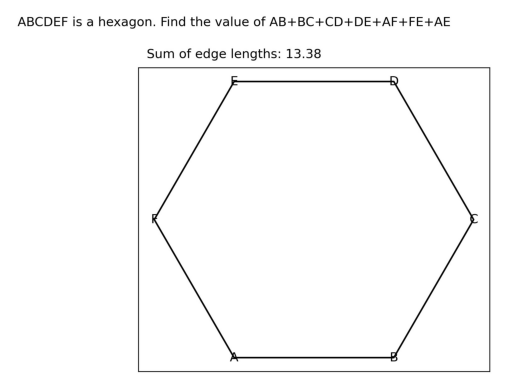

In [4]:
context = "ABCDEF is a hexagon. Find the value of AB+BC+CD+DE+AF+FE+AE "
create_image(context)

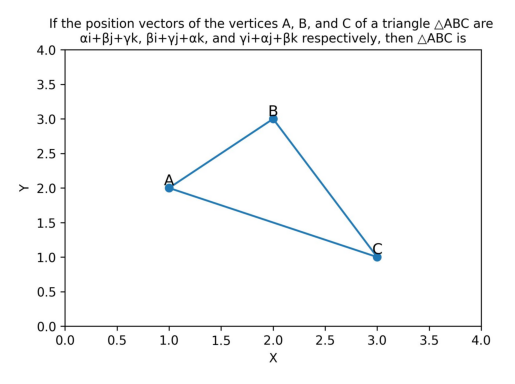

In [8]:
context = ("If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is ")
create_image(context)


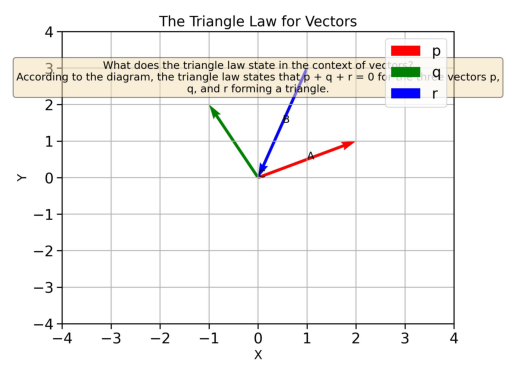

In [5]:
context4 = "What does the triangle law state in the context of vectors? According to the diagram, the triangle law states that p + q + r = 0 for the three vectors p, q, and r forming a triangle."
create_image(context4)

Figure(600x400)


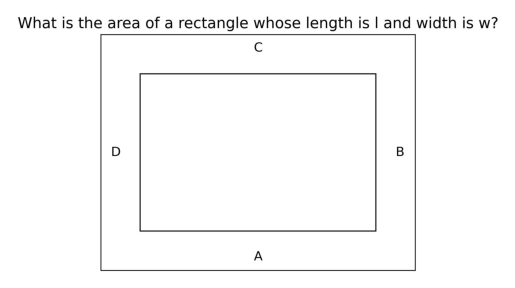

In [10]:
context5 = "what is area of rectangle whose length is l and width is w"
create_image(context5)

In [11]:
# obj = AudioToText()
# obj.convert("audiofilessample")

In [6]:
#read text file from local
def read_file(filename):
    with open(filename, 'r') as f:
        return f.read()

In [7]:
text  = read_file("/Users/tiwarysa/Documents/mathimage/customer_document/video_text.txt")

In [8]:
modelid = "anthropic.claude-v2"
question = "create a summary of the entire document"

maxt = 500
t = 0.9

In [9]:
note = getText("1.notes.docx")

In [10]:
note

'\tत्रिविमीय निर्देशांक ज्यामिती\n\n\tअष्टक (octant) – 8 भाग \t\n\t\n\t\n\tx अक्ष का समी. y = 0,  z = 0 \n\tx अक्ष पर कोई बिंदु (a, 0, 0)\n\ty अक्ष का समी.  x = 0,  y = 0 \n\ty अक्ष पर बिंदु (0, b, 0)\n\tz अक्ष का समी.  x = 0,  y = 0 \n\txy तल का समी.  z = 0                  \n\txy तल पर बिंदु (a, b, 0)\n\tyz तल का समी.  x = 0 \n\tyz तल पर बिंदु (0, b, c)\n\tzx तल का समी. y = 0\n\tzx तल पर बिंदु (a, 0, c)   \n\tदो बिंदुओं A(x1, y1, z1) तथा B(x2, y2, z2)  के मध्य दूरी \n\t\n\t\n\t \n\tतीन बिंदुओं A(x1, y1, z1), B(x2, y2, z2) तथा C(x3, y3, z3) के संरेख/समरेख होना (Collinear)   \n\t \n\tत्रिभुज के तीनों शीर्षों के निर्देशांक  A(x1, y1, z1), B(x2, y2, z2) तथा C(x3, y3, z3) हो, तो  का केन्द्रक (Centroid)\n\t \n\t\n\n\tचतुष्फलक के चारों शीर्षों के निर्देशांक  A(x1, y1, z1), B(x2, y2, z2), C(x3, y3, z3) तथा D(x4 y4, z4) हो, तो चतुष्फलक(tetrahedron) का केन्द्रक\n\t\n\t का अन्त:केन्द्र (Incentre)\n\t\n\ta = भुजा BC,  b = भुजा AC,  c = भुजा AB\n\tदो बिंदुओं A(x1, y1, z1) तथा B(x2, y2, z2) का विभ

In [11]:
# summary = create_summary(text)
# #save summary to file
# with open('summary.txt', 'w') as f:
#     f.write(summary)

In [12]:
#read summary txt file from local

read_file = open("summary.txt", "r")
summary = read_file.read()

combined_document = note_and_text(note, summary)

In [13]:
# prompt = f'''Human: Please generate 3 multiple-choice questions and their respective answers based on the content provided in the attached document. Each question should have 4 answer choices, with only one correct answer.
#         additionally, please provide a brief explanation for each correct answer, helping to clarify the reasoning behind it.
#         create the answer in json format include question, options, answer, explanation. 
#         the documents are belonging to math topic, so create basic questions for different type so shapes.

#         <book>
#         {combined_document}A
#         </book>
#         create the response in json format

#         Assistant:'''

# body = json.dumps({"prompt": prompt})

In [14]:
prompt = f'''Human: Please generate 5 multiple-choice questions and their respective answers based on the content provided in the attached document. The questions should cover a range of difficulty levels (easy, medium, and hard) and test different aspects of the content, such as factual information, concepts, and analysis. Each question should have 4 answer choices, with only one correct answer
        please include question, options, answer, explanation. 
        <book>
        {summary}
        </book>
        create the response in json format

        Assistant:'''

body = json.dumps({"prompt": prompt})

In [15]:
question = question_answer_generation(body)

{
  "questions": [
    {
      "question": "What is the formula to find the distance between two points A(x1, y1, z1) and B(x2, y2, z2) in three-dimensional coordinate geometry?",
      "options": [
        "A. √[(x2-x1)2 + (y2-y1)2 + (z2-z1)2]",
        "B. (x2-x1)2 + (y2-y1)2 + (z2-z1)2",
        "C. (x2+x1)2 + (y2+y1)2 + (z2+z1)2",
        "D. √[(x2+x1)2 + (y2+y1)2 + (z2+z1)2]"
      ],
      "answer": "A",
      "explanation": "The distance formula in three-dimensional coordinate geometry is an extension of the Pythagorean theorem, and it involves taking the square root of the sum of the squared differences between the respective coordinates of the two points."
    },
    {
      "question": "What are the coordinates of the mid-point M of a line segment AB, where A(x1, y1, z1) and B(x2, y2, z2)?",
      "options": [
        "A. M = ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)",
        "B. M = ((x1-x2)/2, (y1-y2)/2, (z1-z2)/2)",
        "C. M = (x1+x2, y1+y2, z1+z2)",
        "D. M = (x1-x2, y1-y2, z1-z2)"
      ],
      "answer": "A",
      "explanation": "The mid-point formula in three-dimensional coordinate geometry is an extension of the two-dimensional case, where the x, y, and z coordinates of the mid-point are the averages of the respective coordinates of the two points."
    },
    {
      "question": "If three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear, which condition must be satisfied?",
      "options": [
        "A. (x1-x2)/(x2-x3) = (y1-y2)/(y2-y3) = (z1-z2)/(z2-z3)",
        "B. (x1+x2)/(x2+x3) = (y1+y2)/(y2+y3) = (z1+z2)/(z2+z3)",
        "C. (x1-x2)/(x2-x3) + (y1-y2)/(y2-y3) + (z1-z2)/(z2-z3) = 0",
        "D. (x1-x2)/(x2-x3) = (y1-y2)/(y2-y3) = (z1-z2)/(z2-z3) = 1"
      ],
      "answer": "A",
      "explanation": "For three points to be collinear in three-dimensional space, the ratios of the differences between their respective coordinates must be equal. This condition ensures that the points lie on the same line."
    },
    {
      "question": "What is the formula to find the centroid (center of mass) of a triangle with vertices A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3), where a, b, and c are the lengths of the sides opposite A, B, and C, respectively?",
      "options": [
        "A. ((ax1+bx2+cx3)/(a+b+c), (ay1+by2+cy3)/(a+b+c), (az1+bz2+cz3)/(a+b+c))",
        "B. ((x1+x2+x3)/3, (y1+y2+y3)/3, (z1+z2+z3)/3)",
        "C. ((ax1+bx2+cx3)/(a-b-c), (ay1+by2+cy3)/(a-b-c), (az1+bz2+cz3)/(a-b-c))",
        "D. ((x1+x2+x3)/(a+b+c), (y1+y2+y3)/(a+b+c), (z1+z2+z3)/(a+b+c))"
      ],
      "answer": "A",
      "explanation": "The centroid of a triangle in three-dimensional space is a weighted average of the coordinates of its vertices, where the weights are proportional to the lengths of the sides opposite to each vertex."
    },
    {
      "question": "If a point R divides the line segment AB internally in the ratio m1:m2, where A(x1, y1, z1) and B(x2, y2, z2), what are the coordinates of R?",
      "options": [
        "A. ((m1x2+m2x1)/(m1+m2), (m1y2+m2y1)/(m1+m2), (m1z2+m2z1)/(m1+m2))",
        "B. ((m1x2-m2x1)/(m1-m2), (m1y2-m2y1)/(m1-m2), (m1z2-m2z1)/(m1-m2))",
        "C. ((m1x1+m2x2)/(m1+m2), (m1y1+m2y2)/(m1+m2), (m1z1+m2z2)/(m1+m2))",
        "D. ((m1x1-m2x2)/(m1-m2), (m1y1-m2y2)/(m1-m2), (m1z1-m2z2)/(m1-m2))"
      ],
      "answer": "A",
      "explanation": "The section formula for finding the coordinates of a point dividing a line segment internally in a given ratio involves taking a weighted average of the coordinates of the two endpoints, where the weights are the respective ratios."
    }
  ]
}

In [17]:
json_data = extract_json(question)
if json_data:
    print(json_data)

{'questions': [{'question': 'What is the formula to find the distance between two points A(x1, y1, z1) and B(x2, y2, z2) in three-dimensional coordinate geometry?', 'options': ['A. √[(x2-x1)2 + (y2-y1)2 + (z2-z1)2]', 'B. (x2-x1)2 + (y2-y1)2 + (z2-z1)2', 'C. (x2+x1)2 + (y2+y1)2 + (z2+z1)2', 'D. √[(x2+x1)2 + (y2+y1)2 + (z2+z1)2]'], 'answer': 'A', 'explanation': 'The distance formula in three-dimensional coordinate geometry is an extension of the Pythagorean theorem, and it involves taking the square root of the sum of the squared differences between the respective coordinates of the two points.'}, {'question': 'What are the coordinates of the mid-point M of a line segment AB, where A(x1, y1, z1) and B(x2, y2, z2)?', 'options': ['A. M = ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)', 'B. M = ((x1-x2)/2, (y1-y2)/2, (z1-z2)/2)', 'C. M = (x1+x2, y1+y2, z1+z2)', 'D. M = (x1-x2, y1-y2, z1-z2)'], 'answer': 'A', 'explanation': 'The mid-point formula in three-dimensional coordinate geometry is an extension o

In [18]:
json_data["questions"][0]

{'question': 'What is the formula to find the distance between two points A(x1, y1, z1) and B(x2, y2, z2) in three-dimensional coordinate geometry?',
 'options': ['A. √[(x2-x1)2 + (y2-y1)2 + (z2-z1)2]',
  'B. (x2-x1)2 + (y2-y1)2 + (z2-z1)2',
  'C. (x2+x1)2 + (y2+y1)2 + (z2+z1)2',
  'D. √[(x2+x1)2 + (y2+y1)2 + (z2+z1)2]'],
 'answer': 'A',
 'explanation': 'The distance formula in three-dimensional coordinate geometry is an extension of the Pythagorean theorem, and it involves taking the square root of the sum of the squared differences between the respective coordinates of the two points.'}

In [19]:
json_data["questions"][1]

{'question': 'What are the coordinates of the mid-point M of a line segment AB, where A(x1, y1, z1) and B(x2, y2, z2)?',
 'options': ['A. M = ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)',
  'B. M = ((x1-x2)/2, (y1-y2)/2, (z1-z2)/2)',
  'C. M = (x1+x2, y1+y2, z1+z2)',
  'D. M = (x1-x2, y1-y2, z1-z2)'],
 'answer': 'A',
 'explanation': 'The mid-point formula in three-dimensional coordinate geometry is an extension of the two-dimensional case, where the x, y, and z coordinates of the mid-point are the averages of the respective coordinates of the two points.'}

In [20]:
json_data["questions"][2]

{'question': 'If three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear, which condition must be satisfied?',
 'options': ['A. (x1-x2)/(x2-x3) = (y1-y2)/(y2-y3) = (z1-z2)/(z2-z3)',
  'B. (x1+x2)/(x2+x3) = (y1+y2)/(y2+y3) = (z1+z2)/(z2+z3)',
  'C. (x1-x2)/(x2-x3) + (y1-y2)/(y2-y3) + (z1-z2)/(z2-z3) = 0',
  'D. (x1-x2)/(x2-x3) = (y1-y2)/(y2-y3) = (z1-z2)/(z2-z3) = 1'],
 'answer': 'A',
 'explanation': 'For three points to be collinear in three-dimensional space, the ratios of the differences between their respective coordinates must be equal. This condition ensures that the points lie on the same line.'}

In [21]:
json_data["questions"][3]

{'question': 'What is the formula to find the centroid (center of mass) of a triangle with vertices A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3), where a, b, and c are the lengths of the sides opposite A, B, and C, respectively?',
 'options': ['A. ((ax1+bx2+cx3)/(a+b+c), (ay1+by2+cy3)/(a+b+c), (az1+bz2+cz3)/(a+b+c))',
  'B. ((x1+x2+x3)/3, (y1+y2+y3)/3, (z1+z2+z3)/3)',
  'C. ((ax1+bx2+cx3)/(a-b-c), (ay1+by2+cy3)/(a-b-c), (az1+bz2+cz3)/(a-b-c))',
  'D. ((x1+x2+x3)/(a+b+c), (y1+y2+y3)/(a+b+c), (z1+z2+z3)/(a+b+c))'],
 'answer': 'A',
 'explanation': 'The centroid of a triangle in three-dimensional space is a weighted average of the coordinates of its vertices, where the weights are proportional to the lengths of the sides opposite to each vertex.'}

In [22]:
import textwrap



Question: ['त्रि-आयामी निर्देशांक ज्यामिति में दो बिंदुओं A (x1, y1, z1) और B (x2,', 'y2, z2) के बीच की दूरी ज्ञात करने का सूत्र क्या है?']
Figure(640x480)


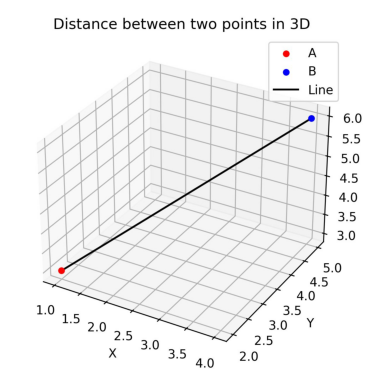

Options: ['A. √[(x2-x1)2 + (y2-y1)2 + (z2-z1)2]', 'B. (x2-x1)2 + (y2-y1)2 + (z2-z1)2', 'C. (x2+x1)2 + (y2+y1)2 + (z2+z1)2', 'D. √[(x2+x1)2 + (y2+y1)2 + (z2+z1)2]']
Answer: A
Explanation: ['त्रि-आयामी निर्देशांक ज्यामिति में दूरी सूत्र पाइथागोरस प्रमेय का एक', 'विस्तार है, और इसमें दो बिंदुओं के संबंधित निर्देशांक के बीच चुकता', 'अंतरों के योग का वर्गमूल लेना शामिल है।']
--------------------------------------
Question: ['रेखाखंड AB, जहाँ A (x1, y1, z1) और B (x2, y2, z2) के मध्य-बिंदु M के', 'निर्देशांक क्या हैं?']
Figure(640x480)


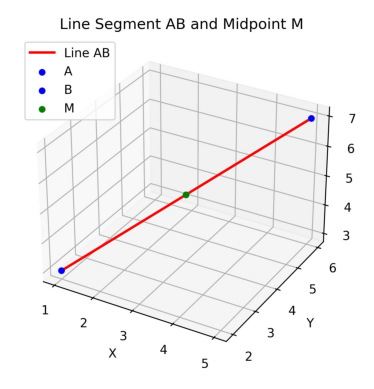

Options: ['A. M = ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)', 'B. M = ((x1-x2)/2, (y1-y2)/2, (z1-z2)/2)', 'C. M = (x1+x2, y1+y2, z1+z2)', 'D. M = (x1-x2, y1-y2, z1-z2)']
Answer: A
Explanation: ['त्रि-आयामी निर्देशांक ज्यामिति में मध्य-बिंदु सूत्र द्वि-आयामी मामले', 'का एक विस्तार है, जहां मध्य-बिंदु के x, y और z निर्देशांक दो बिंदुओं', 'के संबंधित निर्देशांक का औसत हैं।']
--------------------------------------
Question: ['यदि तीन बिंदु A (x1, y1, z1), B (x2, y2, z2), और C (x3, y3, z3)', 'समरेखीय हैं, तो कौन सी शर्त पूरी होनी चाहिए?']
The three points A, B, and C are collinear.
Figure(800x600)


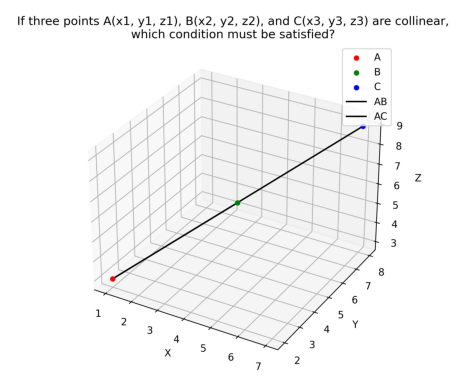

Options: ['A. (x1-x2)/(x2-x3) = (y1-y2)/(y2-y3) = (z1-z2)/(z2-z3)', 'B. (x1+x2)/(x2+x3) = (y1+y2)/(y2+y3) = (z1+z2)/(z2+z3)', 'C. (x1-x2)/(x2-x3) + (y1-y2)/(y2-y3) + (z1-z2)/(z2-z3) = 0', 'D. (x1-x2)/(x2-x3) = (y1-y2)/(y2-y3) = (z1-z2)/(z2-z3) = 1']
Answer: A
Explanation: ['त्रि-आयामी अंतरिक्ष में तीन बिंदुओं के समरेखीय होने के लिए, उनके', 'संबंधित निर्देशांक के बीच के अंतर का अनुपात समान होना चाहिए। यह स्थिति', 'सुनिश्चित करती है कि बिंदु एक ही रेखा पर स्थित हों।']
--------------------------------------
Question: ['शीर्ष A (x1, y1, z1), B (x2, y2, z2), और C (x3, y3, z3), और C (x3, y3,', 'z3) वाले त्रिभुज के केन्द्रक (द्रव्यमान का केंद्र) को खोजने का सूत्र', 'क्या है, जहाँ a, b, और c क्रमशः A, B और C के विपरीत भुजाओं की लंबाई', 'हैं?']


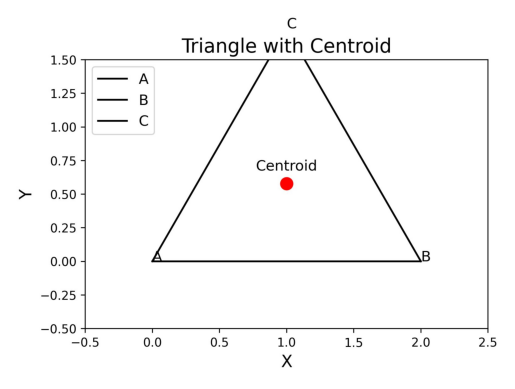

Options: ['A. ((ax1+bx2+cx3)/(a+b+c), (ay1+by2+cy3)/(a+b+c), (az1+bz2+cz3)/(a+b+c))', 'B. ((x1+x2+x3)/3, (y1+y2+y3)/3, (z1+z2+z3)/3)', 'C. ((ax1+bx2+cx3)/(a-b-c), (ay1+by2+cy3)/(a-b-c), (az1+bz2+cz3)/(a-b-c))', 'D. ((x1+x2+x3)/(a+b+c), (y1+y2+y3)/(a+b+c), (z1+z2+z3)/(a+b+c))']
Answer: A
Explanation: ['त्रि-आयामी अंतरिक्ष में एक त्रिभुज का केन्द्रक उसके शीर्षों के', 'निर्देशांकों का भारित औसत होता है, जहाँ भार प्रत्येक शीर्ष के विपरीत', 'भुजाओं की लंबाई के समानुपाती होता है।']
--------------------------------------
Question: ['यदि एक बिंदु R रेखा खंड AB को आंतरिक रूप से m1:m2 के अनुपात में', 'विभाजित करता है, जहाँ A (x1, y1, z1) और B (x2, y2, z2), तो R के', 'निर्देशांक क्या हैं?']


Traceback (most recent call last):
  File "/Users/tiwarysa/Documents/mathimage/main.py", line 29, in <module>
    ax.text(x1 + 0.1, y1 + 0.1, z1 + 0.1, 'A', fontsize=12)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 695, in text
    effective_kwargs = {
                       ^
TypeError: 'str' object is not a mapping


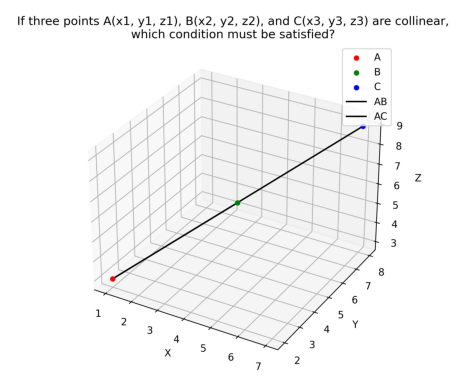

Options: ['A. ((m1x2+m2x1)/(m1+m2), (m1y2+m2y1)/(m1+m2), (m1z2+m2z1)/(m1+m2))', 'B. ((m1x2-m2x1)/(m1-m2), (m1y2-m2y1)/(m1-m2), (m1z2-m2z1)/(m1-m2))', 'C. ((m1x1+m2x2)/(m1+m2), (m1y1+m2y2)/(m1+m2), (m1z1+m2z2)/(m1+m2))', 'D. ((m1x1-m2x2)/(m1-m2), (m1y1-m2y2)/(m1-m2), (m1z1-m2z2)/(m1-m2))']
Answer: A
Explanation: ['किसी दिए गए अनुपात में आंतरिक रूप से एक रेखा खंड को विभाजित करने वाले', 'बिंदु के निर्देशांक खोजने के लिए अनुभाग सूत्र में दो समापन बिंदुओं के', 'निर्देशांक का भारित औसत लेना शामिल है, जहां भार संबंधित अनुपात होते', 'हैं।']
--------------------------------------


In [23]:
# Access the questions and their details
questions = json_data["questions"]
for question in questions:
    print("Question:", textwrap.wrap(translate(question["question"])))
    create_image(question["question"])
    print("Options:", question["options"])
    print("Answer:", question["answer"])
    print("Explanation:", textwrap.wrap(translate(question["explanation"])))
    print("--------------------------------------")